<a href="https://colab.research.google.com/github/scskalicky/creative_naming_lsa/blob/main/analyse_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# load in the saved dictionaries
import pickle

#reload saved NES and ROM semantic similarity dictionaries
nes_file = open(r'/content/drive/MyDrive/creative_naming/nes_sims.pkl', 'rb')
nes_sims = pickle.load(nes_file)
nes_file.close()

rom_file = open(r'/content/drive/MyDrive/creative_naming/rom_sims.pkl', 'rb')
rom_sims = pickle.load(rom_file)
rom_file.close()

In [3]:
nes_sims.keys()

dict_keys(['balloon', 'box', 'carrot', 'fork', 'shovel', 'toilet', 'couch', 'glasses', 'wallet'])

In [4]:
len(nes_sims.values())

dict_length = 0
for key in nes_sims.keys():
  dict_length = dict_length + len(nes_sims[key])
  print(dict_length)

47
102
153
196
227
283
343
404
436


Because there were repeated answers, the dictionaries will not have repeats. so we want to get the old csv and add the values to each row, to repopulate the repeats with the average values. 


### **Easy calculations first, get average similarity for each answer**


In [10]:
import statistics

# needed to create dictionary with deep slice
from collections import defaultdict

# each answer has a sim score for each other answer to that same item
# we average those into a single score per answer, per item, per lang group

nes_averages = defaultdict(dict)

for item in nes_sims.keys():
  for answer in nes_sims[item].keys():
    values = [v for v in nes_sims[item][answer].values()]
    nes_averages[item][answer] = statistics.mean(values)

In [11]:
nes_averages['balloon']['air ball']

# should be:
# 0.4814808192779182

0.4814808192779182

In [12]:
rom_averages = defaultdict(dict)

for item in rom_sims.keys():
  for answer in rom_sims[item].keys():
    values = [v for v in rom_sims[item][answer].values()]
    #rom_averages.append(['English L2', item, answer, statistics.mean(values)])
    rom_averages[item][answer] = statistics.mean(values)

In [13]:
# get the old raw data to add the values. 
import pandas as pd
raw_dat = pd.read_csv('/content/drive/MyDrive/creative_naming/creative_naming_raw_answers_withSIM.csv')

# make copies to avoid annoying pandas indexing warnings + clean up name of lang group
raw_dat_nes = raw_dat.loc[(raw_dat['group'] == 'NES') & (raw_dat['on.task'] == 1)].copy()
raw_dat_nes = raw_dat_nes.replace("NES", "English L1")

raw_dat_rom = raw_dat.loc[(raw_dat['group'] == 'ROM') & (raw_dat['on.task'] == 1)].copy()
raw_dat_rom = raw_dat_rom.replace("ROM", 'English L2')

In [14]:
# add averages to nes data
# the data is unequal size so a loop allows us to check the answer
# this is because some answers are repeated, so the dict only has one entry
# despite using iterrows() this is still fast - I suppose since it's just looking into a dictionary.

for index, row in raw_dat_nes.iterrows():
  item = raw_dat_nes.loc[index, 'item']
  answer = raw_dat_nes.loc[index, 'cleaned_answer']
  raw_dat_nes.loc[index, 'avg_sim'] = nes_averages[item][answer]

In [157]:
raw_dat_nes

,Unnamed: 0,subject,group,item,original_answer,cleaned_answer,on.task,sim_to_item,avg_sim
0,53,49998,English L1,balloon,air ball /,air ball,1,0.630809,0.481481
1,54,49998,English L1,box,Compressed paper container,compressed paper container,1,0.244441,0.380144
2,55,49998,English L1,carrot,orange veggie,orange veggie,1,0.617006,0.404878
3,56,49998,English L1,fork,eating tool,eating tool,1,0.414731,0.464062
4,57,49998,English L1,shovel,digger,digger,1,0.623323,0.494093
...,...,...,...,...,...,...,...,...,...
573,626,996990,English L1,carrot,healthy orange sticks,healthy orange sticks,1,0.276643,0.378327
574,627,996990,English L1,couch,wide chair,wide chair,1,0.496236,0.407650
575,628,996990,English L1,glasses,face-mounted eye cover,face mounted eye cover,1,0.276620,0.366678
576,629,996990,English L1,shovel,dirt digger,dirt digger,1,0.632907,0.565828


In [16]:
# add averages to rom data
for index, row in raw_dat_rom.iterrows():
  item = raw_dat_rom.loc[index, 'item']
  answer = raw_dat_rom.loc[index, 'cleaned_answer']

  raw_dat_rom.loc[index, 'avg_sim'] = rom_averages[item][answer]

In [17]:
# create combined version of the data
avg_sims = pd.concat([raw_dat_nes, raw_dat_rom])
avg_sims.columns

Index(['Unnamed: 0', 'subject', 'group', 'item', 'original_answer',
       'cleaned_answer', 'on.task', 'sim_to_item', 'avg_sim'],
      dtype='object')

In [18]:
# average similarity among answers
avg_sims.groupby(['group', 'item'])['avg_sim'].describe()

count      mean       std  ...       50%       75%       max
group      item                                ...                              
English L1 balloon   63.0  0.410784  0.070278  ...  0.433016  0.458589  0.488554
           box       63.0  0.384180  0.087194  ...  0.403722  0.453623  0.522475
           carrot    65.0  0.335845  0.078288  ...  0.335227  0.404878  0.444092
           couch     64.0  0.366208  0.080763  ...  0.371863  0.426596  0.505306
           fork      65.0  0.399154  0.075456  ...  0.426285  0.449216  0.488537
           glasses   67.0  0.386572  0.095945  ...  0.398289  0.459565  0.504471
           shovel    64.0  0.466173  0.078905  ...  0.470733  0.527766  0.565828
           toilet    63.0  0.432801  0.091164  ...  0.439560  0.498718  0.546229
           wallet    64.0  0.506617  0.093566  ...  0.509363  0.584954  0.584954
English L2 balloon   75.0  0.362702  0.082735  ...  0.381900  0.425881  0.469742
           box       74.0  0.281305  0.064148  ...  0.283655  0.329725  0.420146
           carrot    74.0  0.369596  0.097297  ...  0.381385  0.464919  0.495027
           couch     74.0  0.310567  0.080781  ...  0.321296  0.363281  0.470349
           fork      74.0  0.332995  0.064151  ...  0.333772  0.385048  0.457263
           glasses   75.0  0.348898  0.081817  ...  0.353789  0.420671  0.483133
           shovel    74.0  0.373186  0.078764  ...  0.384555  0.439225  0.472167
           toilet    69.0  0.281266  0.076989  ...  0.290325  0.352666  0.419524
           wallet    76.0  0.450784  0.088117  ...  0.512827  0.514774  0.520615

[18 rows x 8 columns]

In [20]:
# average similarity to the item name
avg_sims.groupby(['group', 'item'])['sim_to_item'].describe()

count      mean       std  ...       50%       75%       max
group      item                                ...                              
English L1 balloon   63.0  0.458508  0.092709  ...  0.471204  0.535977  0.630809
           box       63.0  0.377885  0.126358  ...  0.403707  0.460278  0.683410
           carrot    65.0  0.386141  0.118613  ...  0.397612  0.468833  0.617006
           couch     64.0  0.380385  0.126454  ...  0.371458  0.442783  0.652784
           fork      65.0  0.350302  0.100303  ...  0.356181  0.407416  0.633895
           glasses   67.0  0.412831  0.150275  ...  0.429445  0.502145  0.668201
           shovel    64.0  0.521649  0.103436  ...  0.545672  0.593298  0.652957
           toilet    63.0  0.454957  0.122521  ...  0.473297  0.519078  0.734088
           wallet    64.0  0.533269  0.094025  ...  0.590295  0.590295  0.721723
English L2 balloon   75.0  0.401878  0.118045  ...  0.412291  0.487372  0.630809
           box       74.0  0.312416  0.140427  ...  0.302028  0.427965  0.666650
           carrot    74.0  0.400597  0.107753  ...  0.401979  0.463758  0.663494
           couch     74.0  0.372269  0.126176  ...  0.380417  0.480659  0.649990
           fork      74.0  0.340491  0.118401  ...  0.320654  0.400281  0.638010
           glasses   75.0  0.364273  0.120679  ...  0.369283  0.452065  0.692432
           shovel    74.0  0.477153  0.133394  ...  0.489839  0.586654  0.700617
           toilet    69.0  0.368223  0.160863  ...  0.368440  0.486593  0.675788
           wallet    76.0  0.466864  0.130954  ...  0.477273  0.590295  0.691685

[18 rows x 8 columns]

In [21]:
avg_sims.groupby('group')['avg_sim'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
English L1,578.0,0.409551,0.096834,0.118631,0.344777,0.424437,0.475488,0.584954
English L2,665.0,0.346531,0.093979,0.078877,0.277500,0.351615,0.415646,0.520615


In [22]:
avg_sims.groupby('group')['sim_to_item'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
English L1,578.0,0.430351,0.131142,0.016914,0.344892,0.434547,0.533055,0.734088
English L2,665.0,0.389725,0.138237,-0.019361,0.289395,0.391802,0.484418,0.700617


In [23]:
# output the data for other analysis
avg_sims.to_csv('/content/drive/MyDrive/creative_naming/avg_sim_combined.csv')

## plotting the similairities

could just do this in R but i wanted to learn seaborn

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

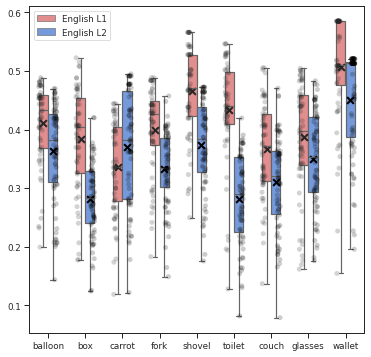

In [26]:
# plotting the joined data

# you can use this to control global plot options
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})   

xdat = 'item'
ydat = 'avg_sim'

sns.set_style("ticks")

# this size chosen for the cogsci paper
fig, ax = plt.subplots(figsize = (6,6)) 

a = sns.boxplot(x = xdat, y = ydat, 
                data = avg_sims, 
                hue = 'group', 
                whis = [0, 100], 
                width = .5, 
               # palette = ['white, white'])
                palette = {'English L1': 'lightcoral', 'English L2':'cornflowerblue'})

sns.stripplot(x = xdat, y = ydat, data = avg_sims, 
              hue = 'group', 
              dodge = .9, 
              alpha = .2, 
              color = 'black')
              #palette = ['lightcoral', 'cornflowerblue'])

sns.pointplot(y = ydat, x = xdat, hue = "group",
              data = avg_sims,
              dodge = .25,
              join = False,
              color = 'black',
              #palette = ['cornflowerblue','lightcoral'],
              markers = 'x', 
              size = 10,
              scale = 1.25, 
              ci = None)

# removes extra items added to legend (guess it just slices to the first 2, clever)
handles, labels = a.get_legend_handles_labels()
a.legend(handles[:2], labels[:2])

ax.set(xlabel = '', ylabel = '')
#ax.set_title('Average similarity of answers', loc = 'left', weight = 'bold')
#weight='bold'

# if you want custom lines use this shit
#for i, artist in enumerate(ax.artists):
 # if i%2 == 0:
  #  artist.set_edgecolor('lightcoral')
  #else:
   # artist.set_edgecolor('cornflowerblue')  
  #artist.set_facecolor('white')

 # for j in range(i*6,i*6+6):
  #  line = ax.lines[j]

   # if j in [0,1,4,5,8,9,12,13,16,17,20,21,24,25]:
    #  line.set_color('blue')
    #else:
     # line.set_color('black')
      #line.set_mfc('yellow')
      #line.set_mec('red')
    #line.set_linewidth(0.5)


plt.savefig('/content/drive/MyDrive/creative_naming/fig1.png', dpi = 400)

In [118]:
dict(zip(avg_sims['item'].unique(), ['black']*9))

{'balloon': 'black',
 'box': 'black',
 'carrot': 'black',
 'couch': 'black',
 'fork': 'black',
 'glasses': 'black',
 'shovel': 'black',
 'toilet': 'black',
 'wallet': 'black'}

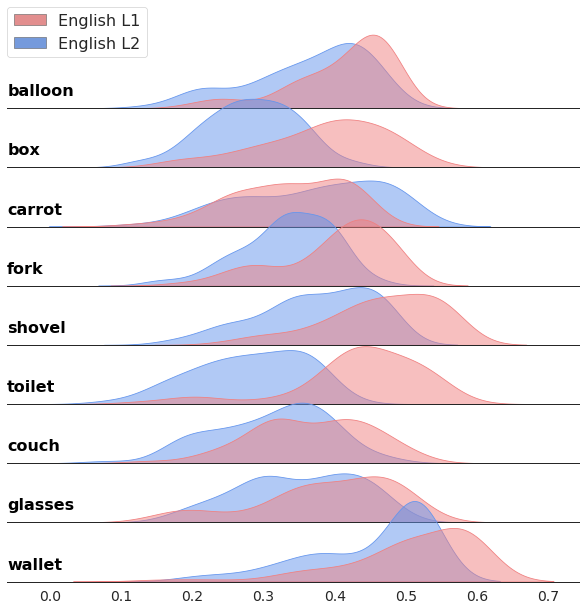

In [169]:
# ridge density plot

# you can use this to control global plot options
sns.set_context("paper", rc = { "font.size" : 16, "axes.titlesize" : 16, "axes.labelsize" : 16})   

# Initialize the FacetGrid object

# make the names of items all the same color (black)
pal = dict(zip(avg_sims['item'].unique(), ['black']*9))

# 
#sns.set_theme(style = "white", rc = {"axes.facecolor": (0, 0, 0, 0)})


g = sns.FacetGrid(avg_sims, row = "item", hue = 'item', aspect = 9, height = 1, palette = pal)

g.map_dataframe(sns.kdeplot, x = "avg_sim", hue = 'group', fill = True, alpha = .5, 
                palette = {'English L1': 'lightcoral', 'English L2': 'cornflowerblue'})
#g.map_dataframe(sns.kdeplot, x = "avg_sim")

# use this to get the labels correctly. 
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight = "bold", color = color,
            ha = "left", va = "center", transform = ax.transAxes)

# need to make sure both the facet and the density plots have hue AND group set.
g.map(label, 'item')
g.set(xlabel = '', ylabel = '')

# remove overlapping crap
g.set_titles("") 
g.set(yticks = [])
g.despine(left = True)

plt.xticks(fontsize = 14)
g.fig.subplots_adjust(hspace = -.3)
# extremely annoying to add legend
plt.legend(loc = [0,6.2], facecolor = 'white', handles = handles[:1] + handles[1:2], prop = {'size' : 16})

plt.savefig('/content/drive/MyDrive/creative_naming/fig2.png', dpi = 400)

# Extraneous plots, just playing with seaborn

In [ ]:
# English L1 
#sns.boxplot(x = 'avg_sim', y = 'item', data = raw_dat_nes, whis = [0, 100], width=.5, color = 'white')

fig, ax = plt.subplots(figsize=(15,10)) 
sns.boxplot(x = 'avg_sim', y = 'item', data = raw_dat_nes, width = .3, whis = [0, 100], color = 'white')

#ax.set_xlim(0,1)
sns.stripplot(x = "avg_sim", y = "item", data = raw_dat_nes, size = 3, alpha = .4, color = 'black')

for i, artist in enumerate(ax.artists):
  # Set the linecolor on the artist to the facecolor, and set the facecolor to None
  #col = lighten_color(artist.get_facecolor(), 1.2)
  #col = 'yellow'
  artist.set_edgecolor('lightcoral')  

  for j in range(i*6,i*6+6):
    line = ax.lines[j]
    line.set_color('blue')
    #line.set_mfc('yellow')
    #line.set_mec('red')
    line.set_linewidth(0.5)

In [ ]:
#I like the custom outlines 
fig, ax = plt.subplots(figsize=(15,10)) 
sns.boxplot(x = 'avg_sim', y = 'item', data = raw_dat_rom, width = .3, whis = [0, 100], color = 'white')

#ax.set_xlim(0,1)
sns.stripplot(x = "avg_sim", y = "item", data = raw_dat_rom, size = 3, alpha = .4, color = 'black')

for i, artist in enumerate(ax.artists):
  # Set the linecolor on the artist to the facecolor, and set the facecolor to None
  #col = lighten_color(artist.get_facecolor(), 1.2)
  #col = 'yellow'
  artist.set_edgecolor('lightcoral')  

  for j in range(i*6,i*6+6):
    line = ax.lines[j]
    line.set_color('blue')
    #line.set_mfc('yellow')
    #line.set_mec('red')
    line.set_linewidth(0.5)

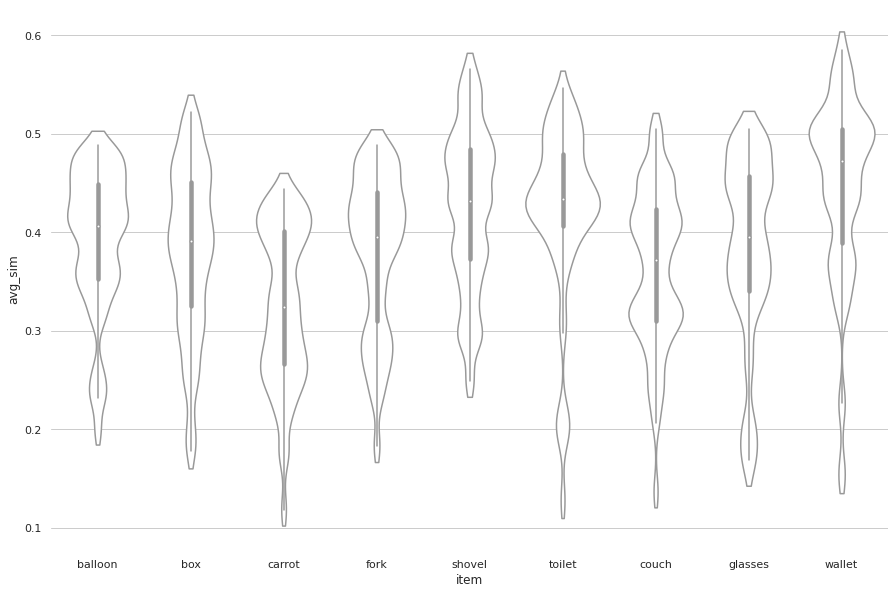

In [ ]:
# Violin plot for fun
plt.rcParams['figure.figsize'] = [15, 10]


nes_avg_sim = nes_summary['avg_sim']
rom_avg_sim = rom_summary['avg_sim']

sns.set_theme(style="whitegrid")

#sns.set_style('white')
#sns.set_context('paper', font_scale=2)

#sns.violinplot(y = nes_summary['avg_sim'], x = nes_summary['item'], palette="Set3", bw = .2, cut = 1)
sns.violinplot(y = nes_summary['avg_sim'], x = nes_summary['item'], bw = .2, cut = 1, color = 'white')

sns.despine(left=True, bottom=True)


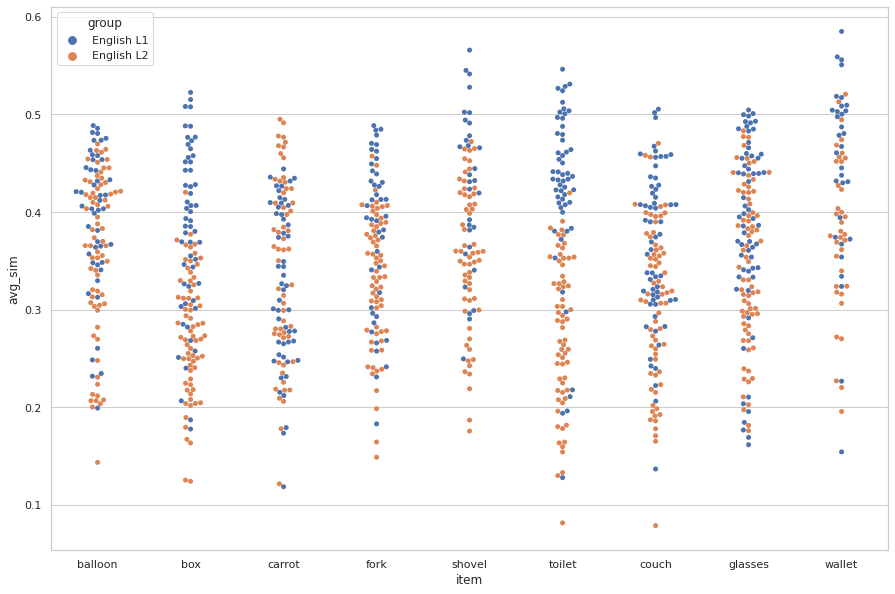

In [ ]:
sns.swarmplot(y = "avg_sim", x = "item", data = avg_sims, hue = 'group')


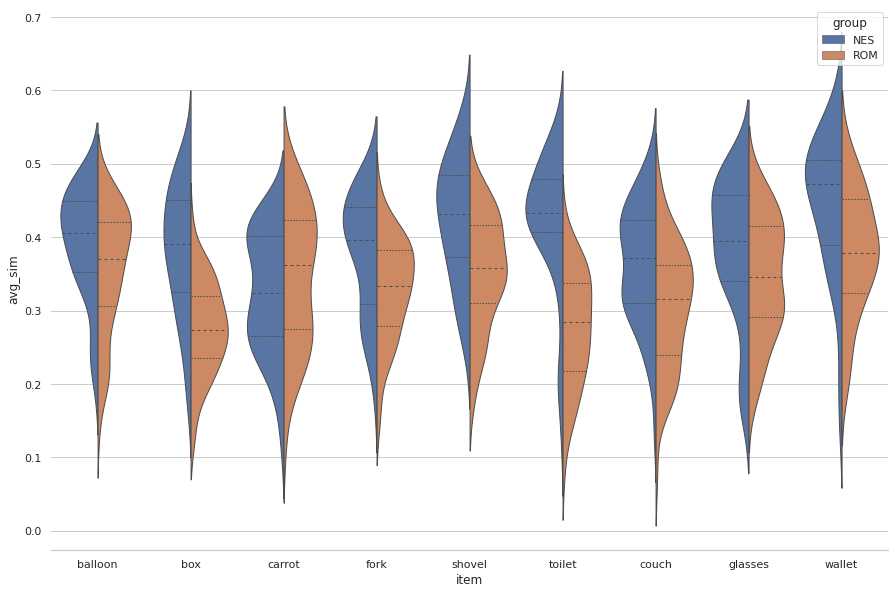

In [ ]:
sns.violinplot(data = avg_sims, x = "item", y = "avg_sim", hue = "group",
               split = True, inner = "quart", linewidth=1)
               #palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

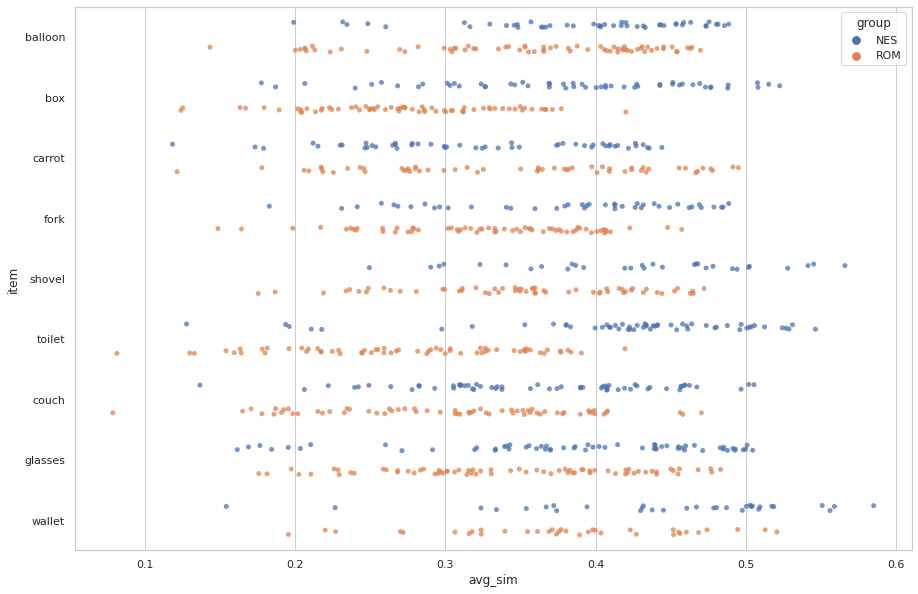

In [ ]:
sns.stripplot(x = "avg_sim", y = "item", data = avg_sims, hue = 'group', dodge = True, alpha = .75, zorder = 1)
